In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

In [2]:
def amap(f, *args, shape=None, dtype=None, count=None):
    if shape == None:
        shape = args[0].shape
    if dtype == None:
        dtype = args[0].dtype
    if count == None:
        count = len(args[0].flatten())
    return(np.fromiter((f(*i) for i in zip(*(a.flatten() for a in args),)), dtype=dtype, count=count).reshape(shape))

In [3]:
rng = np.random.default_rng()
a = rng.standard_normal((2, 2, 2))
b = rng.standard_normal((2, 2, 2))
z = np.array([0, 1]).repeat(4).reshape((2, 2, 2))
print(a)
print(b)
print(z)

print('Out: ')
print(amap((lambda x,y,z: (x + y)*z), a, b, z))
print(a+b)

print('More out: ')
print(amap(lambda x: x**2, a))
print(a**2)

[[[-1.55257964  0.42010099]
  [ 0.54983282  1.81083508]]

 [[-0.92637505  1.13798912]
  [ 0.08322224  0.78900291]]]
[[[-1.5793876  -0.93806661]
  [-2.96789162 -0.52624528]]

 [[ 0.85039261 -1.40409104]
  [ 0.54439458  0.74871232]]]
[[[0 0]
  [0 0]]

 [[1 1]
  [1 1]]]
Out: 
[[[-0.         -0.        ]
  [-0.          0.        ]]

 [[-0.07598244 -0.26610191]
  [ 0.62761681  1.53771523]]]
[[[-3.13196724 -0.51796562]
  [-2.4180588   1.2845898 ]]

 [[-0.07598244 -0.26610191]
  [ 0.62761681  1.53771523]]]
More out: 
[[[2.41050355 0.17648485]
  [0.30231613 3.27912369]]

 [[0.85817073 1.29501925]
  [0.00692594 0.62252559]]]
[[[2.41050355 0.17648485]
  [0.30231613 3.27912369]]

 [[0.85817073 1.29501925]
  [0.00692594 0.62252559]]]


In [4]:
df = pandas.read_fwf('star_mass_data_mean.txt').set_index('Time')

name = 'fgas=0.5'
title = '$f_{gas} = 0.5$'
tstart = 350
tspec = 100
intervals = np.array([[200, 300], [700, 800], [350, 450]])

In [5]:
radii = np.loadtxt("../../radius_bins.txt")
radii_names = np.array(["{:.1f}kpc".format(n) for n in radii])

In [6]:
# https://stackoverflow.com/a/2566508/13326516
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

In [7]:
tstart = find_nearest(df.index, tstart)
tspec = find_nearest(df.index, tspec)
tmax = df.index.max()
intervals = amap(lambda x: find_nearest(df.index, x), intervals)
interval_names = np.array(['from {:.0f} to {:.0f} Myr'.format(x[0], x[1]) for x in intervals])

In [8]:
profiles = df.loc[tstart:].aggregate(['min', 'median', 'max'], axis=0).T
profiles['100'] = df.loc[tspec, :]
for l, s in zip(intervals, interval_names):
    profiles[s] = df.loc[l[0]:(l[1]+0.001),:].median()
profiles

,min,median,max,100,from 195 to 303 Myr,from 704 to 801 Myr,from 352 to 449 Myr
Formed,5.251780e+11,5.331330e+11,5.339510e+11,3.017520e+11,4.901520e+11,5.334290e+11,5.281480e+11
Total,1.180370e+12,1.188330e+12,1.189150e+12,9.569490e+11,1.145350e+12,1.188630e+12,1.183345e+12
0.1kpc,5.894310e+09,7.605120e+09,1.640530e+10,4.393420e+09,1.128320e+10,7.547285e+09,9.009040e+09
0.2kpc,2.323540e+10,2.972480e+10,5.380690e+10,2.156730e+10,5.035480e+10,2.925785e+10,3.672315e+10
0.3kpc,4.971620e+10,6.345330e+10,1.004080e+11,6.827420e+10,1.056130e+11,6.121160e+10,8.003630e+10
...,...,...,...,...,...,...,...
80.4kpc,1.180350e+12,1.187600e+12,1.189090e+12,9.569490e+11,1.145350e+12,1.188090e+12,1.183325e+12
82.8kpc,1.180360e+12,1.187680e+12,1.189100e+12,9.569490e+11,1.145350e+12,1.188175e+12,1.183325e+12
85.2kpc,1.180360e+12,1.187780e+12,1.189110e+12,9.569490e+11,1.145350e+12,1.188260e+12,1.183325e+12
87.6kpc,1.180370e+12,1.187920e+12,1.189120e+12,9.569490e+11,1.145350e+12,1.188330e+12,1.183335e+12


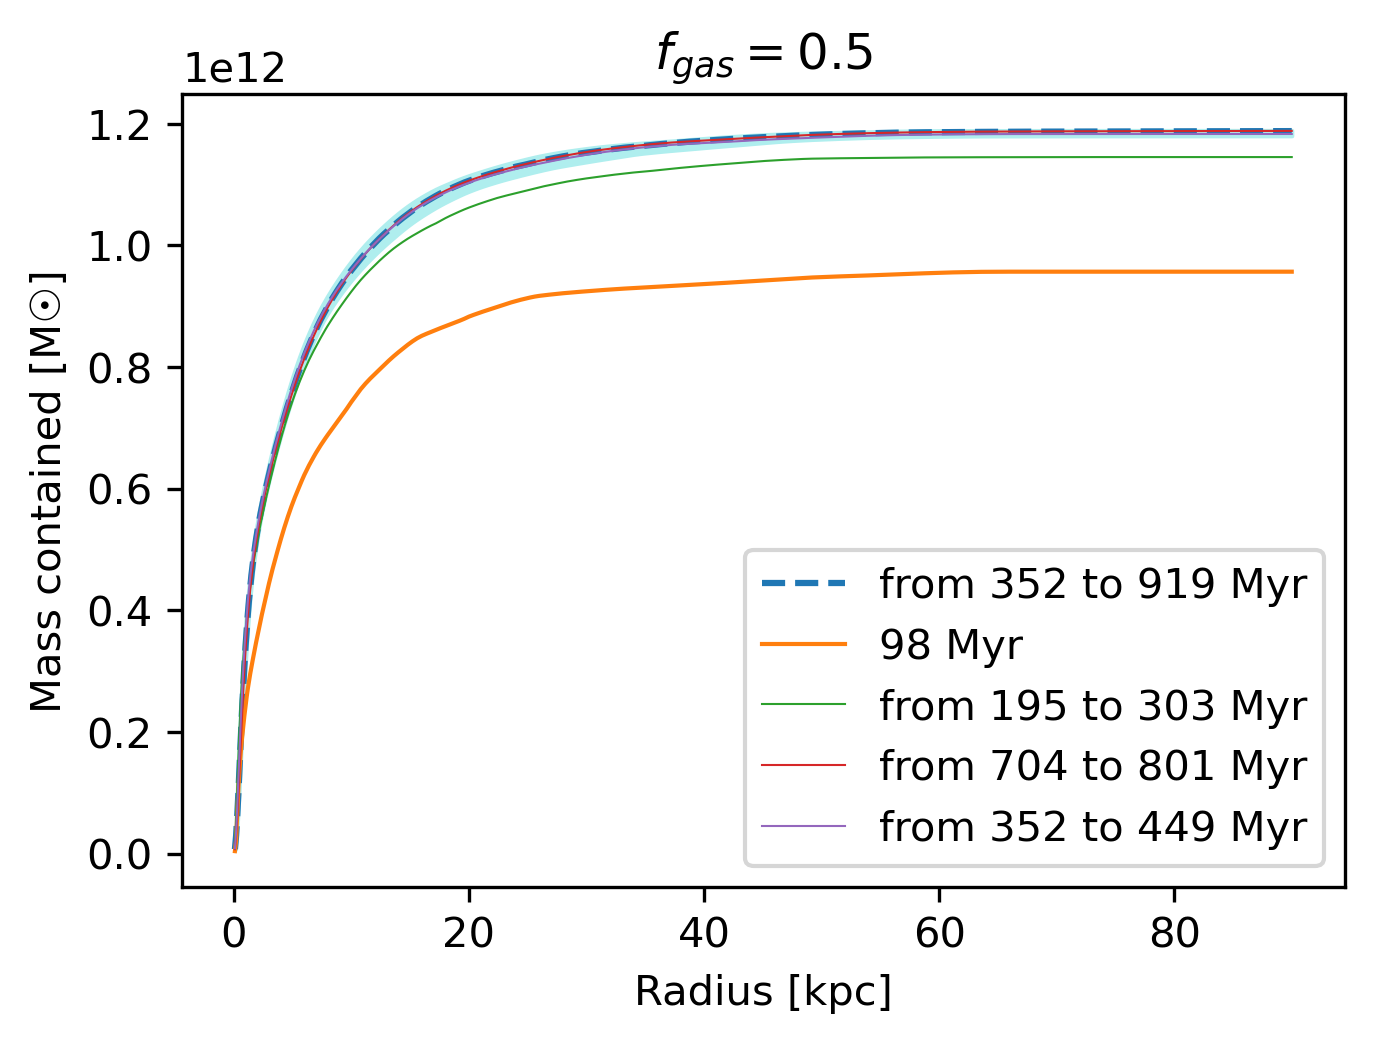

In [9]:
fig, ax = plt.subplots(figsize=(5,3.5), dpi=300)
ax.fill_between(radii, profiles.loc[radii_names, 'min'], profiles.loc[radii_names, 'max'], color='paleturquoise')
ax.plot(radii, profiles.loc[radii_names, 'median'], label='from {:.0f} to {:.0f} Myr'.format(tstart, tmax), linewidth=1.5, linestyle='--')
ax.plot(radii, profiles.loc[radii_names, '100'], label='{:.0f} Myr'.format(tspec), linewidth=1)

for l, s in zip(intervals, interval_names):
    ax.plot(radii, profiles.loc[radii_names, s], label=s, linewidth=0.5)

ax.legend(loc='best')
ax.set_xlabel('Radius [kpc]')
ax.set_ylabel('Mass contained [M☉]')
ax.set_title(title)
    
fig.savefig('radial_profiles_{}.pdf'.format(name))

In [10]:
df_export = pandas.DataFrame(profiles.loc[('Total', *radii_names), ('100', 'median', *interval_names)])
df_export = df_export.rename(columns={
    'median':'from {:.0f} to {:.0f} Myr'.format(tstart, tmax),
    '100':'{:.0f} Myr'.format(tspec)
})
df_export

,98 Myr,from 352 to 919 Myr,from 195 to 303 Myr,from 704 to 801 Myr,from 352 to 449 Myr
Total,9.569490e+11,1.188330e+12,1.145350e+12,1.188630e+12,1.183345e+12
0.1kpc,4.393420e+09,7.605120e+09,1.128320e+10,7.547285e+09,9.009040e+09
0.2kpc,2.156730e+10,2.972480e+10,5.035480e+10,2.925785e+10,3.672315e+10
0.3kpc,6.827420e+10,6.345330e+10,1.056130e+11,6.121160e+10,8.003630e+10
0.4kpc,1.086600e+11,1.026090e+11,1.601210e+11,9.954935e+10,1.278520e+11
...,...,...,...,...,...
80.4kpc,9.569490e+11,1.187600e+12,1.145350e+12,1.188090e+12,1.183325e+12
82.8kpc,9.569490e+11,1.187680e+12,1.145350e+12,1.188175e+12,1.183325e+12
85.2kpc,9.569490e+11,1.187780e+12,1.145350e+12,1.188260e+12,1.183325e+12
87.6kpc,9.569490e+11,1.187920e+12,1.145350e+12,1.188330e+12,1.183335e+12


In [11]:
df_export.to_string('radial_profiles_{}.txt'.format(name), float_format=lambda x: '{:.5g}'.format(x))